In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Looking at the raw data

In [2]:
train = sns.load_dataset('titanic')
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Read headers
train.columns

# Read each column
print (train['sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object


In [4]:
# Read each row
train.loc[train['sex'] == "male"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Count number and rows in dataset
train.shape

(891, 15)

In [7]:
#Shows all the missing data from the dataset
train.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Count survivors
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

# Visualizing the data

<AxesSubplot:>

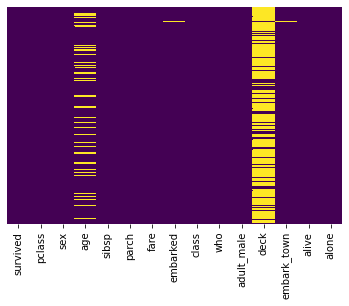

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

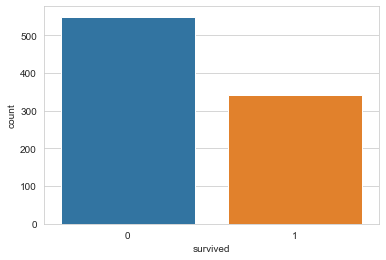

In [10]:
#Visualize survivors and non survivors
sns.set_style('whitegrid')
sns.countplot(x='survived',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

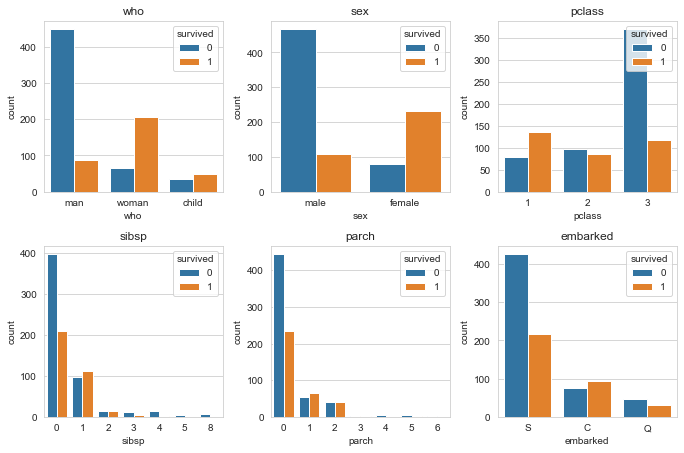

In [11]:
#Visualize categories of survivors
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

#Subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2) )

for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c #Index to go through number of columns
        ax = axs[r][c] #Show where to position each sub plot
        sns.countplot(train[cols[i]], hue=train['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc = 'upper right')
        
plt.tight_layout()

<AxesSubplot:xlabel='survived', ylabel='count'>

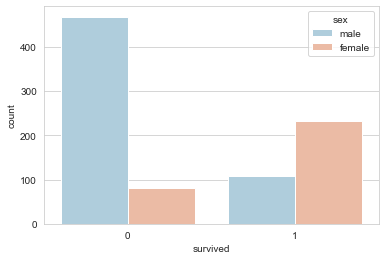

In [12]:
#Survivors & non sex
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

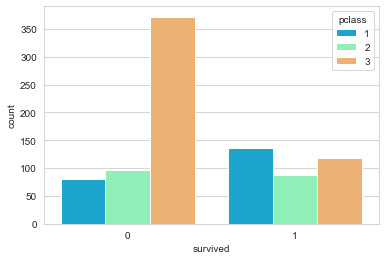

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=train,palette='rainbow')

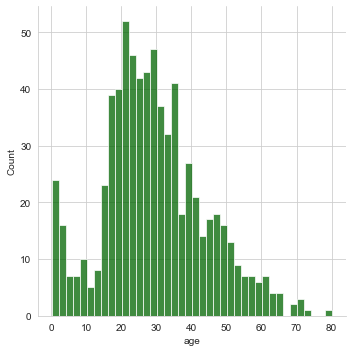

In [14]:
sns.displot(train['age'].dropna(),kde=False,color='darkgreen',bins=40)

<AxesSubplot:>

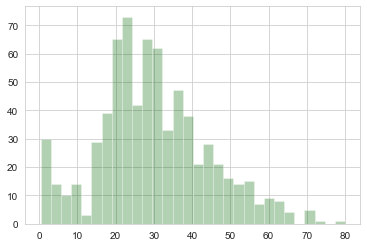

In [15]:
train['age'].hist(bins=30,color='darkgreen',alpha=0.3)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

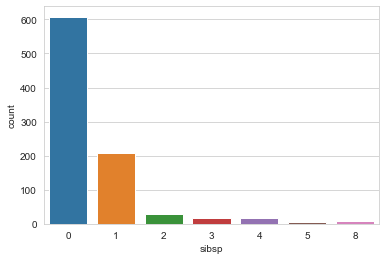

In [16]:
sns.countplot(x='sibsp',data=train)

<AxesSubplot:>

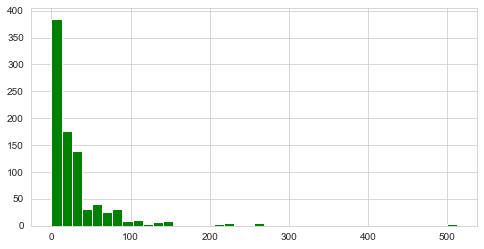

In [17]:
train['fare'].hist(color='green',bins=40,figsize=(8,4))

In [18]:
#Survival rate by sex
train.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [19]:
#Survival rate by sex and class
train.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Females in first class have the highest rate of survival. Males in first class have the highest rate of survival for males. Lowest survival rate overall were men in third class.

<AxesSubplot:xlabel='sex'>

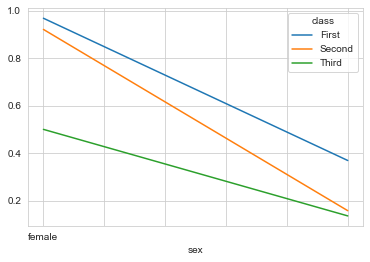

In [20]:
train.pivot_table('survived', index='sex', columns='class').plot()

In [21]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'survived', values = ['age','sibsp','parch','fare'])

,age,fare,parch,sibsp
survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


<AxesSubplot:xlabel='class', ylabel='survived'>

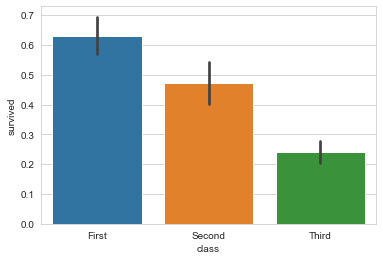

In [22]:
#Plot survival rate of the classes
sns.barplot(x='class',y='survived', data=train)

Initial analysis:
Most men did not survive. Passengers in 3rd class did not have a high survival rate. If you did not have a sibling or spouse with you, you are not likely to have survived. If you did not have a parent or child with you, you are not likely to have survived. If you've embarked in Southhampton, you were not likely to have survived.

In [23]:
import cufflinks as cf
cf.go_offline()

In [24]:
train['fare'].iplot(kind='hist',bins=30,color='green')

<AxesSubplot:xlabel='pclass', ylabel='age'>

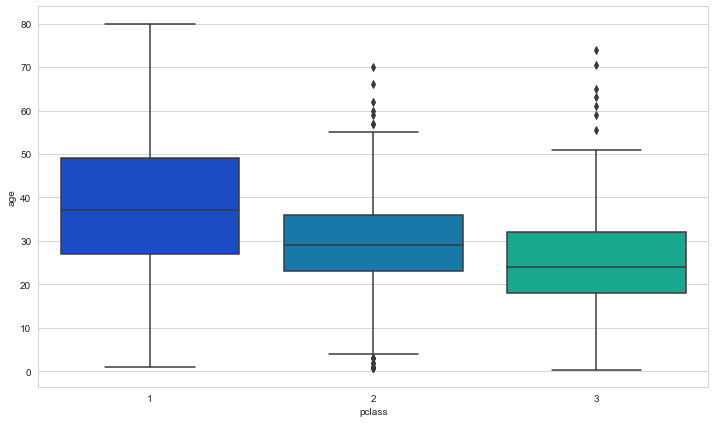

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=train,palette='winter')

<AxesSubplot:>

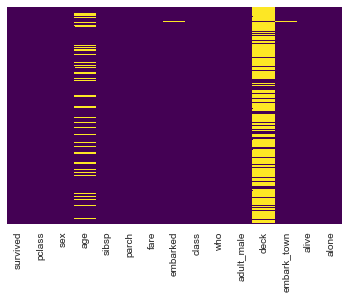

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
#Look at survival rate by sex, age, and class
age = pd.cut(train['age'], [0,18,80])
train.pivot_table('survived',['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Women between the age 18-80 who were in first class had the highest rate of survival.

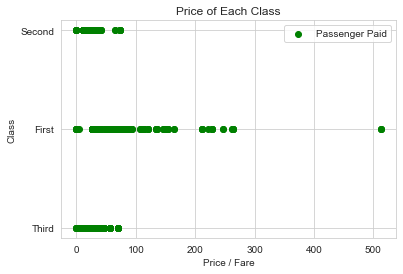

In [28]:
#Plot the prices paid of each class
plt.scatter(train['fare'],train['class'], color='green', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [29]:
#Count empty values in each column
train.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
#Look at all of the values in each column and get a count
for val in train:
    print(train[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [31]:
#Drop the columns -- redudant information or too much information missing
train = train.drop(['deck', 'embark_town', 'alive', 'class','who','alone','adult_male'], axis =1)

#Remove rows with missing values
train = train.dropna(subset = ['embarked','age'])

In [32]:
#Count the new nuber of rows and columns
train.shape

(712, 8)

In [33]:
#Look at data types
train.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
train.iloc[:, 2] = labelencoder.fit_transform( train.iloc[:, 2].values)

#Encode the embarked column
train.iloc[:, 7] = labelencoder.fit_transform( train.iloc[:, 7].values)

In [35]:
#Print the unique values
print(train['sex'].unique())
print(train['embarked'].unique())

[1 0]
[2 0 1]


In [36]:
train.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [37]:
#Split the data into independent 'X' and dependent 'Y' variables
X = train.iloc[:, 1:8].values
Y = train.iloc[:,0].values

In [38]:
#Split dataset into 80%training & 20%testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Creating a prediction model

In [40]:
#Create a function with many machine learning models
def models(X_train,Y_train):

    #Logistics Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Use SVC (Linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    #Use the RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy:', forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [41]:
#Get and train all the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Neighbors Training Accuracy: 0.8664323374340949
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF Training Accuracy: 0.8506151142355008
[4]Gaussian NB Training Accuracy: 0.8031634446397188
[5]Decision Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9753954305799648


Decision tree and Random Forest are the most accurate on training data

In [42]:
#Show the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
    
    #Extract true negative, false positive, false negative, true positive
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score ))
    print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



Random forest did the best on the test data. Forest is the best model. It did 2nd best on training data and best on test data.

In [43]:
#Get feature importance
forest = model[6]
importances = pd.DataFrame({'feature': train.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<AxesSubplot:xlabel='feature'>

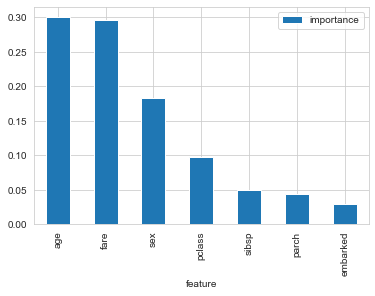

In [44]:
#Visualize the importances
importances.plot.bar()

In [45]:
#Print the predictaion of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#Print actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [52]:
#Pclass(1,2,3), sex(0 female, 1 men), age, sibsp, parch, fare, embarked (1,2,3)

my_survival = [[3, 0, 21, 1, 1, 50, 3 ]] #My own data

#Scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#Print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
    print('You will not survive!')
else:
    print('You will survive!')

[0]
You will not survive!
